In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii

In [6]:
path = './../data/ZTF_ForcedPhot/'

In [7]:
peaks = {'SN2020xlt':59141.45,
         'SN2018gjx':58379.44,
         'SN2020rsc':59081.47,
         'SN2019rta':58759.43,
         'SN2020ano':58871.45,
         'SN2020ikq':58971.30
        }

In [282]:
sn_name = 'SN2020rsc'
filepath = path+'{}_lc.txt'.format(sn_name)


In [313]:
# Using readlines()
file1 = open(filepath, 'r')
Lines = file1.readlines()

In [314]:
for line in Lines:
    if line.startswith('#'):
        continue
    if line.startswith(' index'):
        columns = line.split()
#     print(line)
#     else:
#         df.loc[len(df.index)] = line.split()

In [315]:
for i,c in enumerate(columns):
    columns[i] = c.strip().split(',')[0]

In [316]:
df = pd.DataFrame(columns=columns)

In [317]:
for line in Lines:
    if line.startswith('#'):
        continue
    if line.startswith(' index'):
        continue
    df.loc[len(df.index)] = line.split()

In [318]:
df['forcediffimflux'][df['forcediffimflux']=='null']= np.nan
df['forcediffimfluxunc'][df['forcediffimfluxunc']=='null']= np.nan
df['forcediffimchisq'][df['forcediffimchisq']=='null']= np.nan
df['forcediffimsnr'][df['forcediffimsnr']=='null']= np.nan
df['nearestrefmag'][df['nearestrefmag'] == 'null']= np.nan 
df['nearestrefmagunc'][df['nearestrefmagunc'] == 'null'] = np.nan

In [319]:
df['jd'] = df['jd'].astype(float)
df['forcediffimflux'] = df['forcediffimflux'].astype(float)
df['forcediffimfluxunc'] = df['forcediffimfluxunc'].astype(float)
df['forcediffimchisq'] = df['forcediffimchisq'].astype(float)
df['forcediffimsnr'] = df['forcediffimsnr'].astype(float)
df['zpdiff'] = df['zpdiff'].astype(float)
df['nearestrefmag'] = df['nearestrefmag'].astype(float)
df['nearestrefmagunc'] = df['nearestrefmagunc'].astype(float)
df['scisigpix'] = df['scisigpix'].astype(float)

In [320]:
peak = peaks[sn_name]
peak_jd = 2400000.5+peak

In [321]:

# df = df[(df['jd']>peak_jd-5)&(df['jd']<peak_jd+25)]

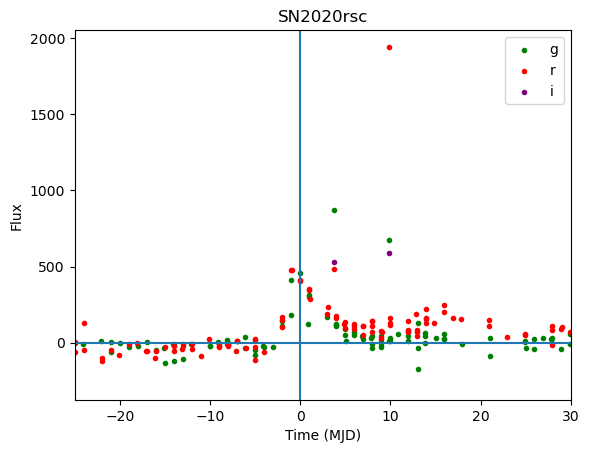

In [322]:
SNT = 0
plt.scatter(df['jd'][(df['filter']=='ZTF_g')]-2400000.5-peak, 
             df['forcediffimflux'][(df['filter']=='ZTF_g')],
            marker='.',
            color='green',
           label='g')
plt.scatter(df['jd'][(df['filter']=='ZTF_r')]-2400000.5-peak, 
             df['forcediffimflux'][(df['filter']=='ZTF_r')],
            marker='.',
            color='red',
           label = 'r')
plt.scatter(df['jd'][(df['filter']=='ZTF_i')]-2400000.5-peak, 
             df['forcediffimflux'][(df['filter']=='ZTF_i')],
            marker='.',
            color='purple',
           label='i')

# peak = 58871.45
plt.xlim(-25, 30)
plt.xlabel('Time (MJD)')
plt.ylabel('Flux')
plt.title(sn_name)
plt.axvline(0)
plt.axhline(0)
plt.legend()
# plt.gca().invert_yaxis()
# plt.savefig(path+sn_name+'_SNR.png')

In [326]:
df = df[(df['forcediffimsnr']>5)]

In [327]:
df['mag'] = df['zpdiff'] - 2.5*np.log10(df['forcediffimflux'])
df['magerr'] = 2.5/np.log(10)*np.abs(df['forcediffimfluxunc']/df['forcediffimflux'])

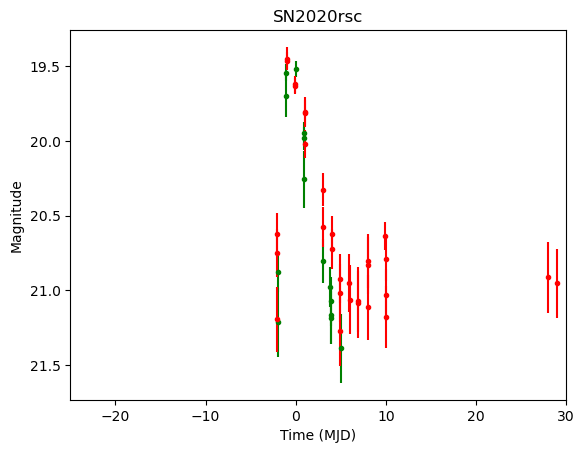

In [328]:
SNT = 0
plt.errorbar(df['jd'][(df['filter']=='ZTF_g')]-2400000.5-peak, 
             df['mag'][(df['filter']=='ZTF_g')],
             yerr = df['magerr'][(df['filter']=='ZTF_g')],
            marker='.', ls='none',
            color='green')
plt.errorbar(df['jd'][(df['filter']=='ZTF_r')]-2400000.5-peak, 
             df['mag'][(df['filter']=='ZTF_r')],
             yerr = df['magerr'][(df['filter']=='ZTF_r')],
            marker='.', ls='none',
            color='red')
plt.errorbar(df['jd'][(df['filter']=='ZTF_i')]-2400000.5-peak, 
             df['mag'][(df['filter']=='ZTF_i')],
             yerr = df['magerr'][(df['filter']=='ZTF_i')],
            marker='.', ls='none',
            color='purple')

# peak = 58871.45
# plt.xlim(peak-25, peak+75)
plt.xlabel('Time (MJD)')
plt.ylabel('Magnitude')
plt.title(sn_name)
plt.axvline(peak)
plt.xlim(-25, 30)

plt.gca().invert_yaxis()
# plt.savefig(path+sn_name+'_SNR.png')

In [281]:
df[['jd','mag', 'magerr', 'filter']].to_csv(path+sn_name+'.csv')

In [329]:
x = df['jd'][(df['filter']=='ZTF_r')]-2400000.5-peak
y = df['mag'][(df['filter']=='ZTF_r')]
p2 = np.poly1d(np.polyfit(x[x>5], y[x>5], 2))

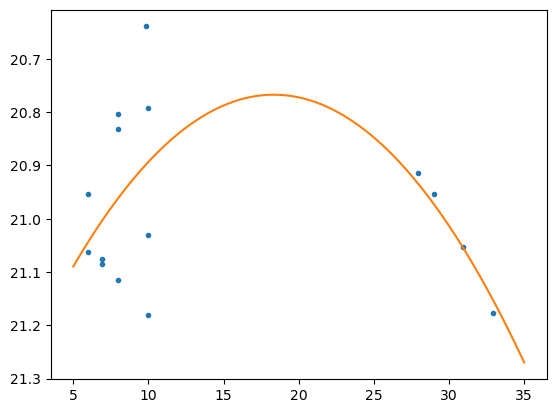

In [331]:
xp = np.linspace(5, 35, 100)
_ = plt.plot(x[x>5], y[x>5], '.', xp, p2(xp), '-')
plt.gca().invert_yaxis()
# plt.ylim(-2,2)

In [306]:
np.min(p2(xp))

20.767441526561313

In [309]:
xp[np.argmin(p2(xp))]+2400000.5+peak

2459100.353838384